# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataset

In [3]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data exploration

In [4]:
data.shape

(891, 12)

In [5]:
# Checking types of columns and also a few missing values on age, cabin and embarked
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Tranforming columns name in lower case
for col in data.columns:
    data.rename(columns={col: col.lower()}, inplace=True)
data.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

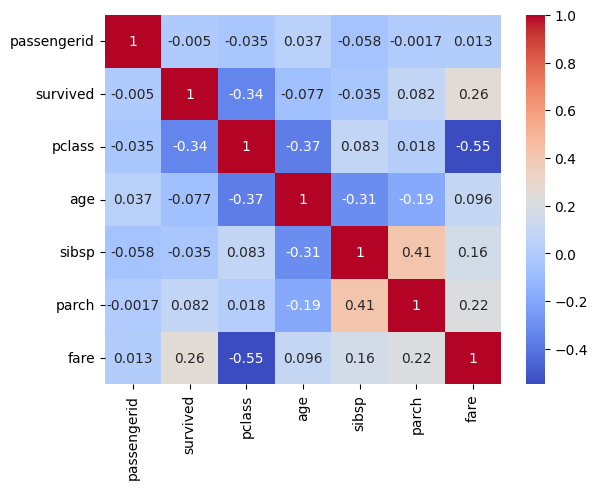

In [8]:
sns.heatmap(data.select_dtypes(exclude='object').corr(), annot=True, cmap='coolwarm');

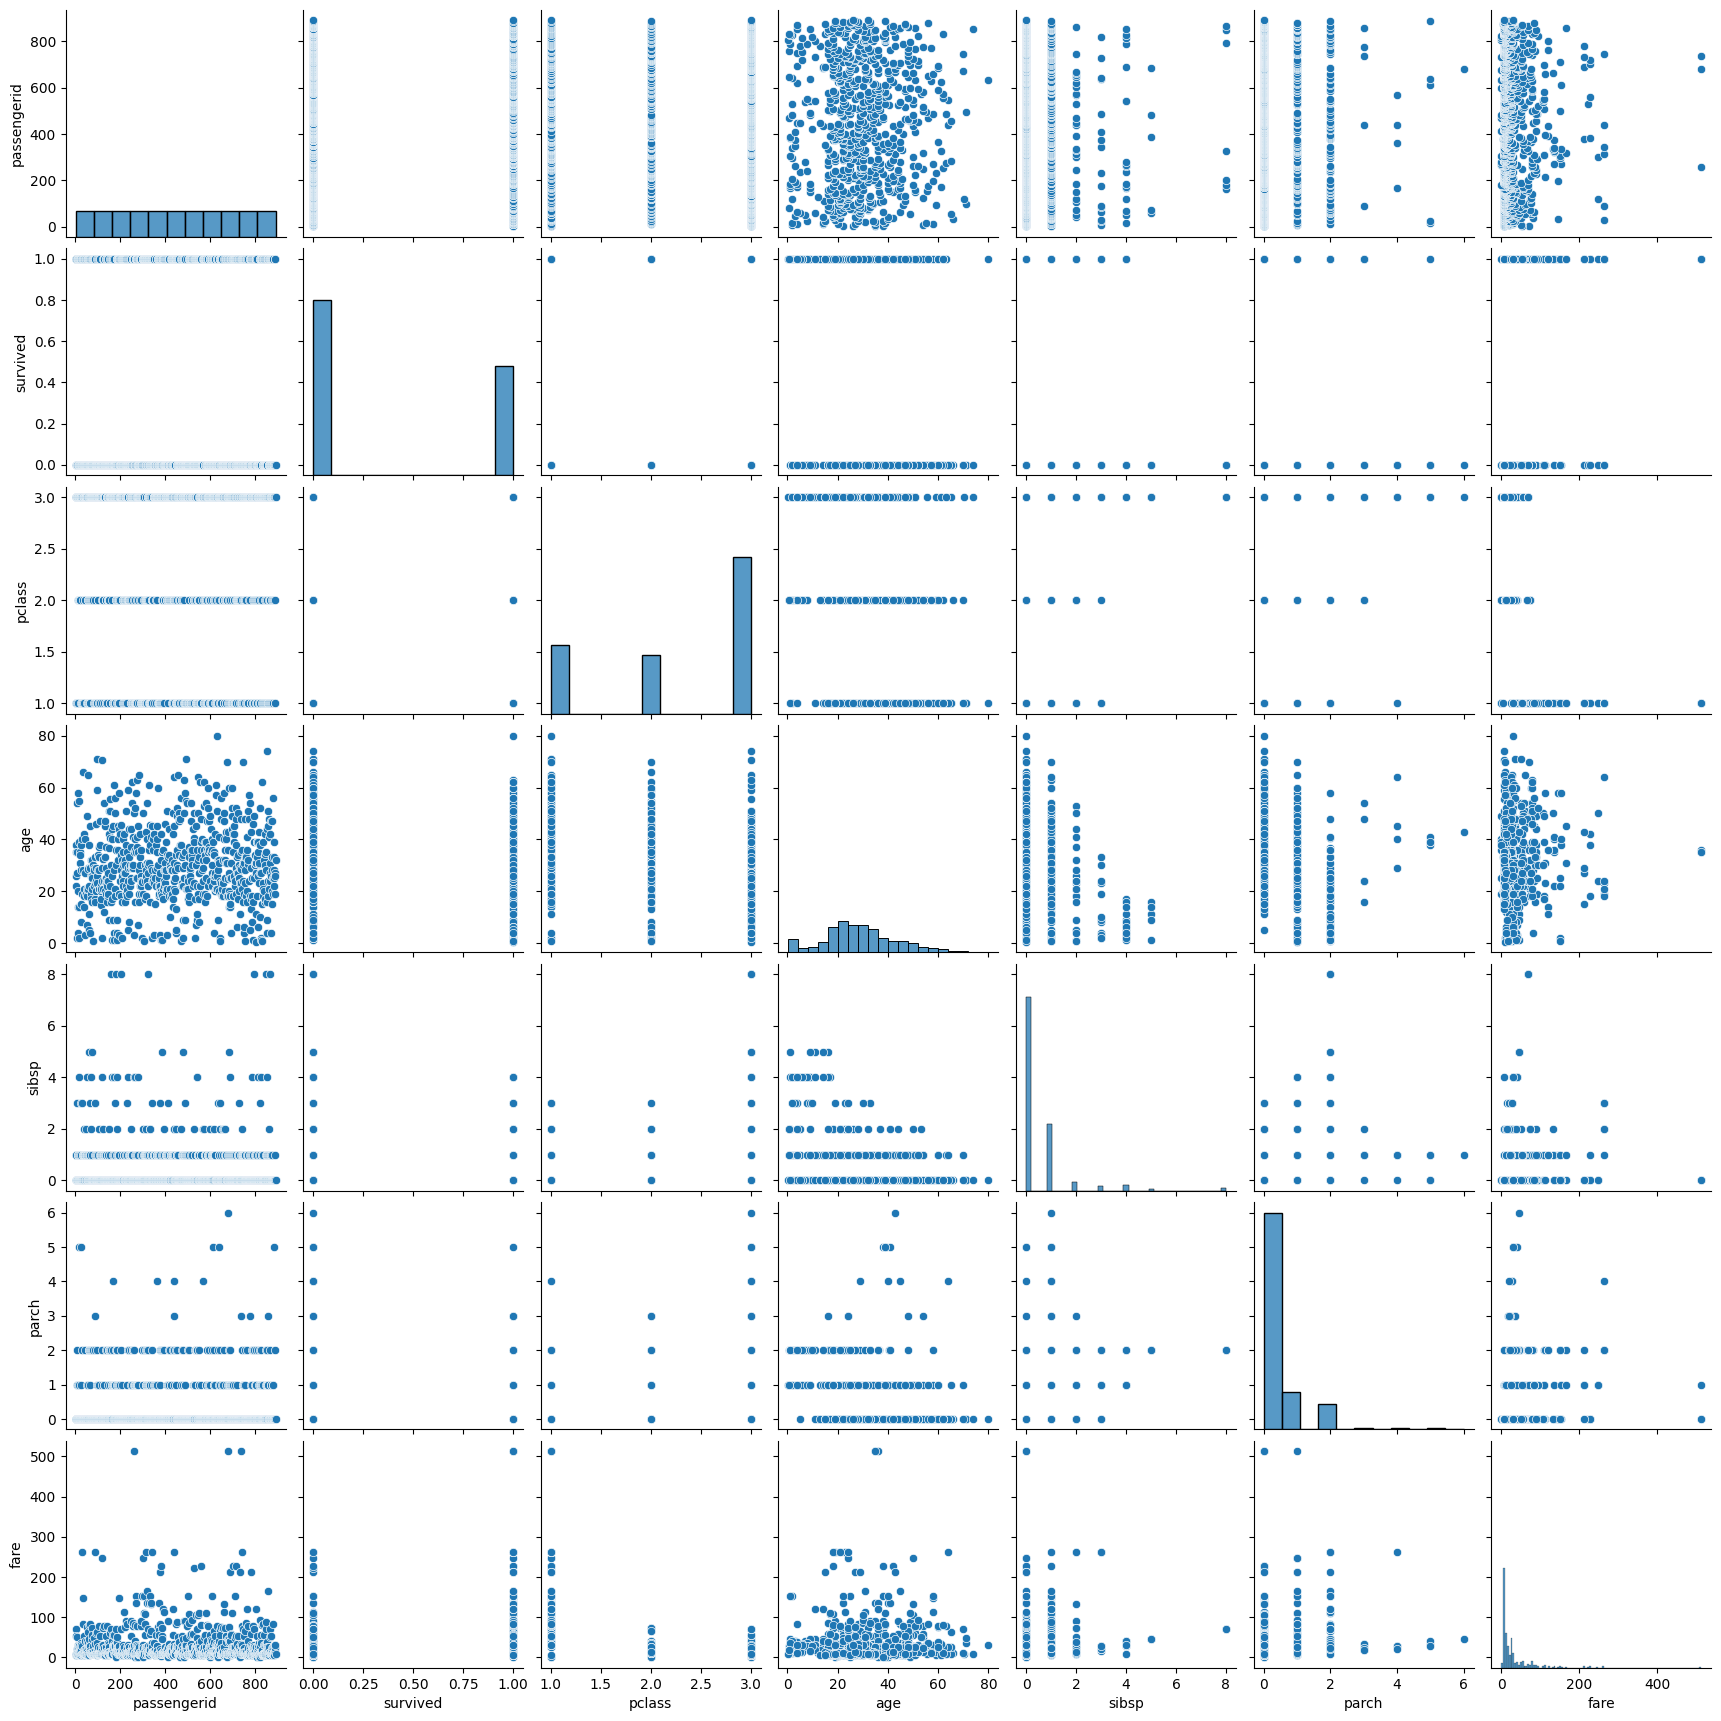

In [9]:
sns.pairplot(data);

# Survivers by sex

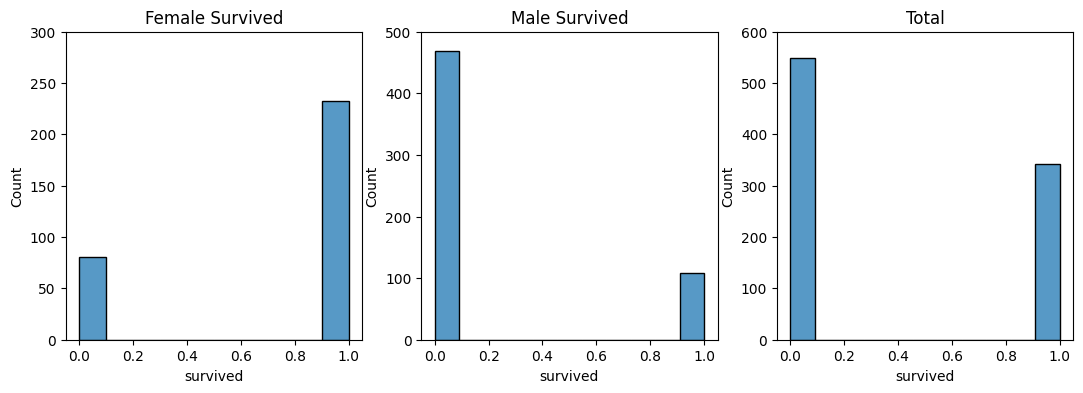

In [10]:
plt.figure(figsize=(13, 4))
plt.subplot(1,3,1)
plt.title('Female Survived')
plt.ylim(top=300)
sns.histplot(data[data['sex'] == 'female']['survived'], )

plt.subplot(1,3,2)
plt.title('Male Survived')
plt.ylim(top=500)
sns.histplot(data[data['sex'] == 'male']['survived'])

plt.subplot(1,3,3)
plt.title('Total')
plt.ylim(top=600)
sns.histplot(data['survived']);

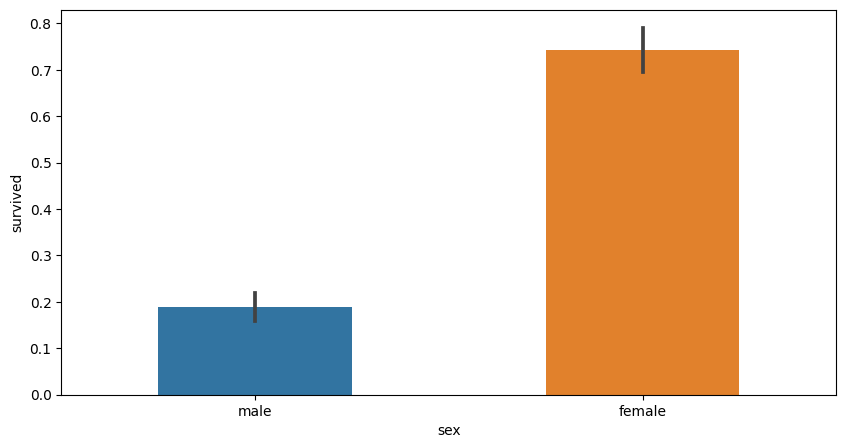

In [11]:
plt.figure(figsize=(10,5))

sns.barplot(x=data.sex, y=data.survived, width=0.5);

## Analysis

Majority of the people in the Titanic are male, the number of death is also male. Almost 600 males were in the ship but only just under 200 people has suvirved.

Just over 300 women was on board and a bit under 300 women suvirved which shows that the sex might have count in this situation

# Survivers by class

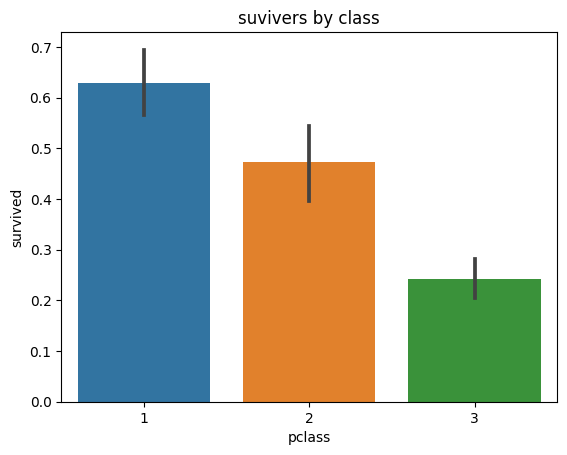

In [12]:
plt.title('suvivers by class')
sns.barplot(x=data.pclass, y=data.survived);

Number of suviver in the first class is bigger than the number of people on the third class . We can say tha the class could be a factor as the number of people in the third class on board is much higher so the probability of find someone in third class is much higher but still we have more people in the first class that suviverd

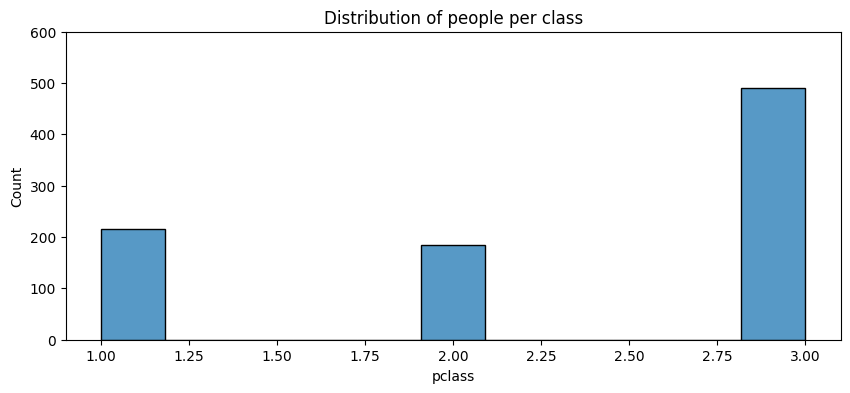

In [13]:
plt.figure(figsize=(10, 4))
plt.title('Distribution of people per class')
plt.ylim(top=600)
sns.histplot(data.pclass);

# Suvirver based on the fare paid

In [14]:
data['fare'].nunique()

248

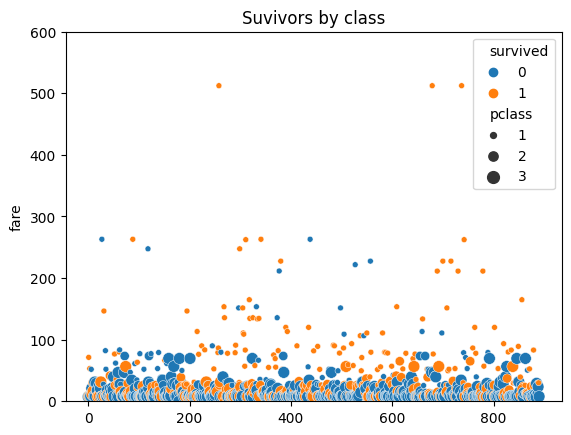

In [15]:
plt.title('Suvivors by class')
plt.ylim(top=600)
sns.scatterplot(data=data, x=data.name.index, y=data.fare, hue=data.survived, size=data.pclass);

People wit the highest fare paid survived. Most of the people tha paid over 100 fare survived and many of the survivers are at least from the second class

# Survivors by age

In [16]:
data.age.nunique()

88

## Overall

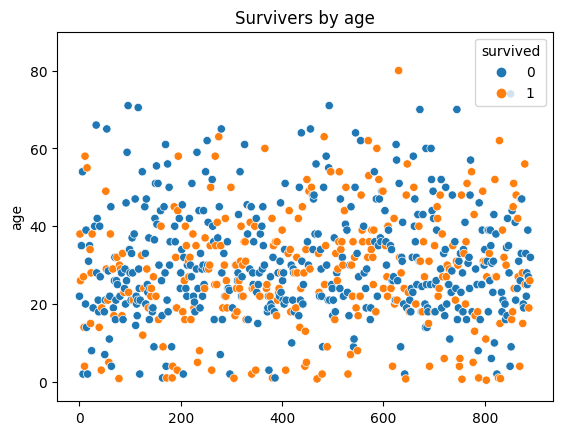

In [17]:
plt.title('Survivers by age')
plt.ylim(top=90, bottom=-5)
sns.scatterplot(data=data, x=data.name.index, y=data.age, hue=data.survived);

## had the children been saved?

By the scatter graph above it looks like many kids below 10 years old survived 

In [18]:
round(len(data[(data['age'] < 18) & (data['survived'] == 1)]) / len(data[data['age'] < 18]), 2)

0.54

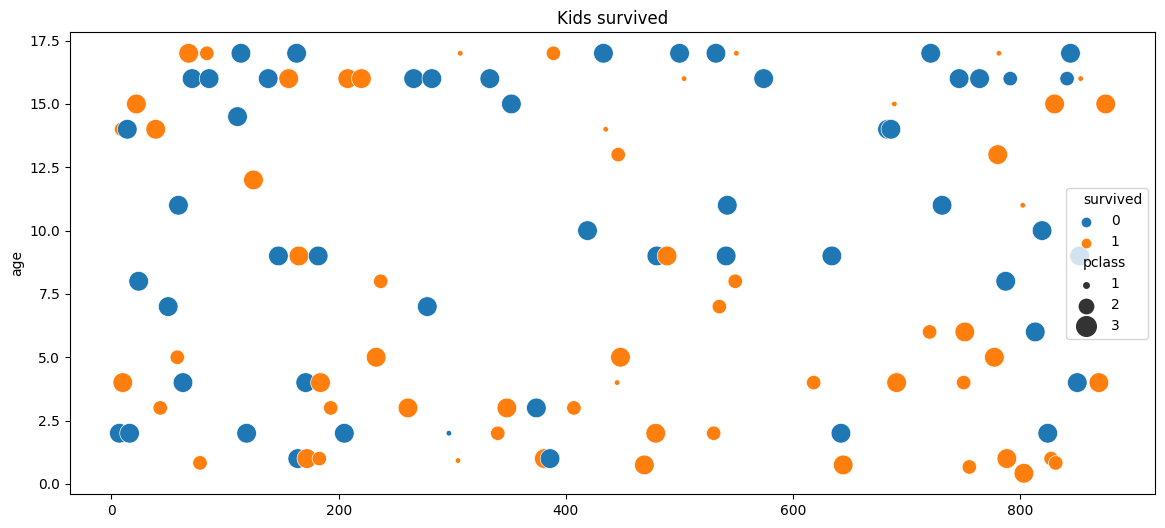

In [19]:
plt.figure(figsize=(14,6))
plt.title('Kids survived')
sns.scatterplot(x=data[data['age'] < 18].index, 
                y=data[data['age'] < 18]['age'], 
                hue=data[data['age'] < 18]['survived'], 
                size=data[data['age'] < 18]['pclass'],
                sizes=(16, 200));

Many kids was save even being in the third class. From the kids under 18 years old 54% survived and lot of them was part of the third class 

# Does the title counted to be saved?

I could see tha many people that paid high fare or was in the first class were saved the most. I wonder if the title the people had at the time counted to be saved or not?

I'll isolate the title from their names and try to see if it had any influence to `survive`

In [20]:
# Define a function to extract the title
def title(text):
    splitname = text.rsplit(',')
    again = splitname[1].rsplit('.')
    return again[0]

In [21]:
# Extract the title
data['title'] = data['name'].apply(title)

In [22]:
data.title.unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
 12  title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [24]:
# For the title in the dataset, take the index and the title
titles = [(title, index) for index, title in enumerate(data.title.unique())]

In [25]:
# Apply the indexes for each row in the dataset
data['title_id'] = data['title'].map(dict(titles))

In [26]:
data.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,title_id
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


In [27]:
# Removing the title space
data['title'] = data['title'].apply(lambda x: x.strip())

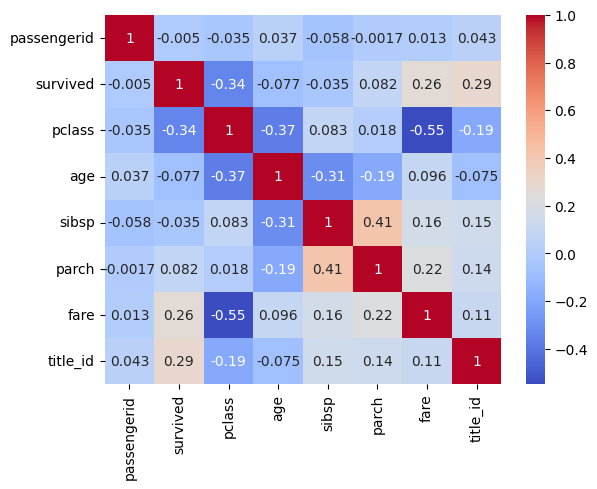

In [28]:
sns.heatmap(data.select_dtypes(exclude='object').corr(), annot=True, cmap='coolwarm');

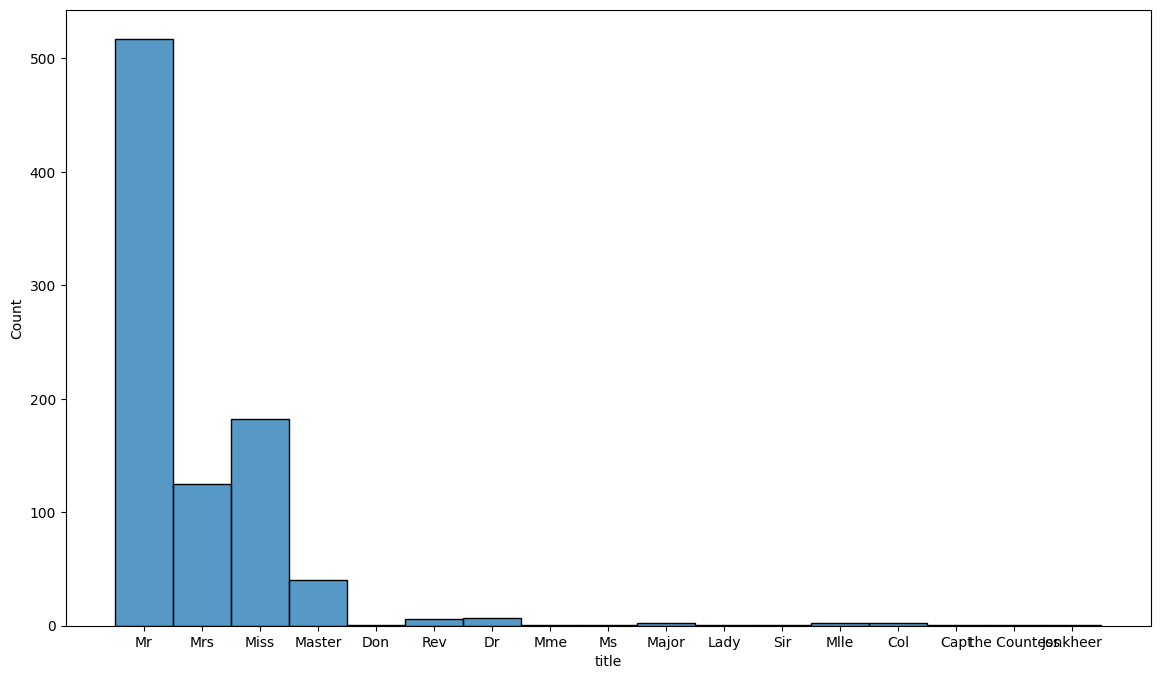

In [29]:
plt.figure(figsize=(14,8))
sns.histplot(data.title);

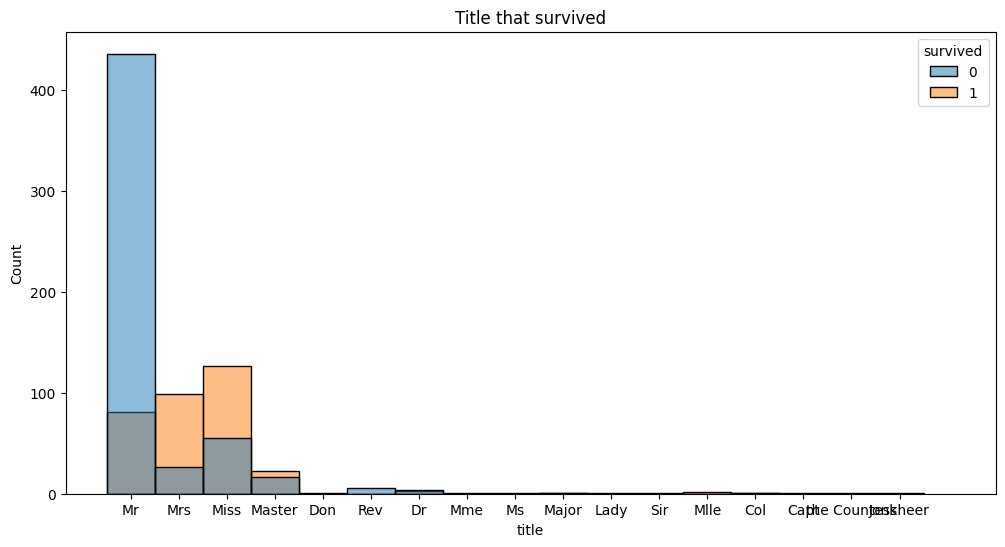

In [30]:
plt.figure(figsize=(12,6))
plt.title('Title that survived')
sns.histplot(data=data, x=data['title'], hue=data['survived'])
plt.xlim(right=18);

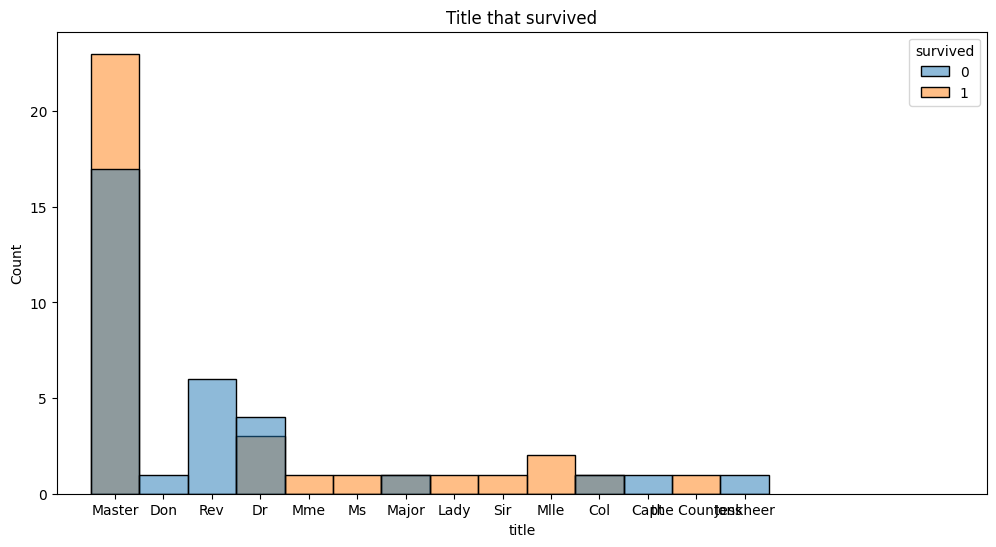

In [31]:
plt.figure(figsize=(12,6))
plt.title('Title that survived')
sns.histplot(data=data,
             x=data[(data['title'] != 'Mr') & (data['title'] != 'Mr') &(data['title'] != 'Mrs') &(data['title'] != 'Miss')]['title'],
             hue=data['survived'])
plt.xlim(right=18);

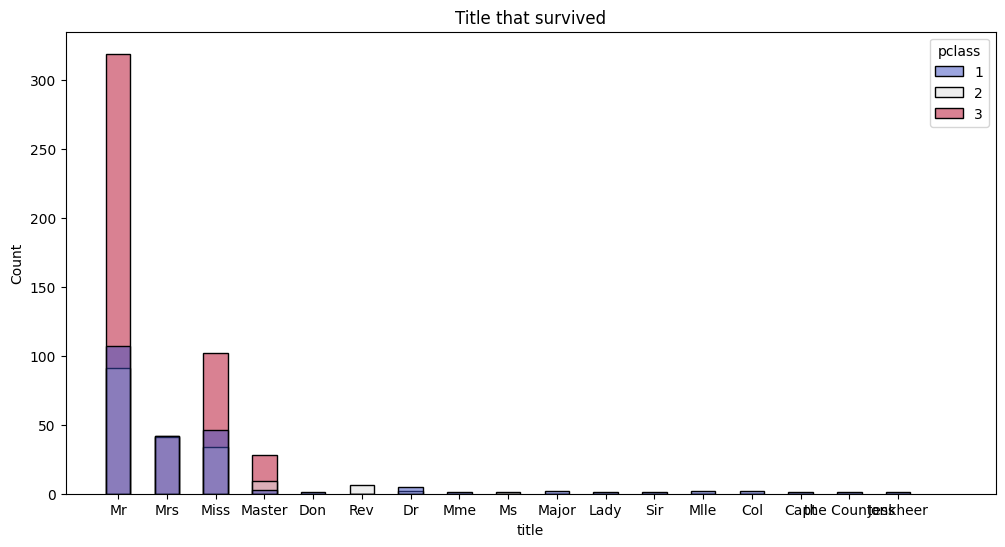

In [32]:
plt.figure(figsize=(12,6))
plt.title('Title that survived')
sns.histplot(data=data, x=data['title'], hue=data['pclass'], palette='coolwarm', shrink=0.5)
plt.xlim(right=18);

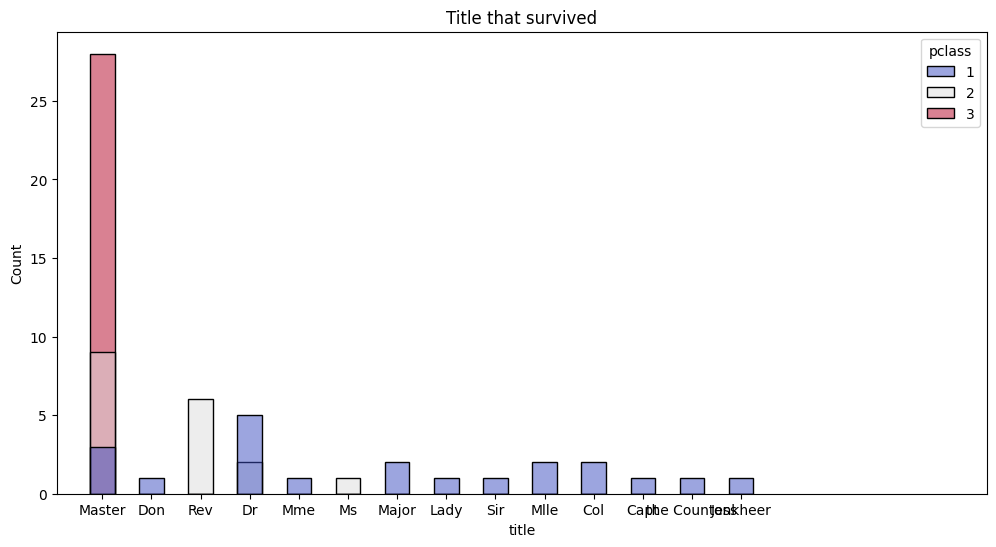

In [33]:
plt.figure(figsize=(12,6))
plt.title('Title that survived')
sns.histplot(data=data, 
             x=data[(data['title'] != 'Mr') & (data['title'] != 'Mr') &(data['title'] != 'Mrs') &(data['title'] != 'Miss')]['title'], 
             hue=data['pclass'], 
             palette='coolwarm', 
             shrink=0.5)
plt.xlim(right=18);

## Conclusion about title

It shows that the title has a strong correlation with the target, however the title onboard are very uneven.

Most of the *Mr* title are from the third class and many of them didn't survive the titanic and same for *Miss* title. Clearly we can see the title is very correlate with the class. If the title is "better", higher is the class and if the class is higher, more chances to survive the titanic

# Preprocessing

## Imports

In [34]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from scipy import stats
from sklearn import set_config; set_config(display='diagram')

## Droping columns
I've seen that there're som columns not really important in our dataset.

In [35]:
data.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'title', 'title_id'],
      dtype='object')

In [36]:
# Droping all the columns unecessery
data.drop(columns=['passengerid', 'name', 'ticket', 'cabin', 'title', 'title_id'], inplace=True)

In [37]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Missing values

In [38]:
# Set X and y
X = data.drop(columns='survived')
y = data['survived']

In [39]:
X.isnull().sum()

pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [40]:
# Filling the age missing with mean of ages
imp_num = SimpleImputer(strategy='mean')

# Filling embarked column
imp_cat = SimpleImputer(strategy='constant', fill_value='N')

X['age'] = imp_num.fit_transform(X[['age']])

In [41]:
X[['embarked']] = imp_cat.fit_transform(X[['embarked']])

In [42]:
X.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

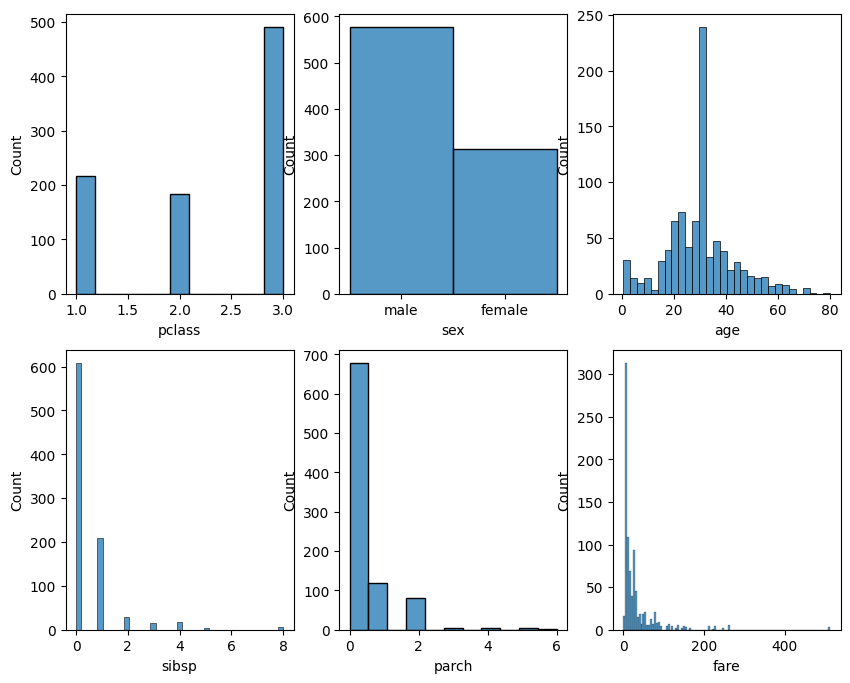

In [43]:
column = [col for col in X.columns]

fig = plt.figure(figsize=(10, 8))

for i in range(1,len(X.columns)):
    plt.subplot(2,3,i)
    sns.histplot(X.iloc[:,i-1])

## Encoding categorical values

In [44]:
encoder = OneHotEncoder(sparse_output=False, drop='if_binary')

X[list(encoder.get_feature_names_out())] = encoder.fit_transform(X[['sex']])
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,sex_male
0,3,male,22.0,1,0,7.2500,S,1.0
1,1,female,38.0,1,0,71.2833,C,0.0
2,3,female,26.0,0,0,7.9250,S,0.0
3,1,female,35.0,1,0,53.1000,S,0.0
4,3,male,35.0,0,0,8.0500,S,1.0


In [55]:
X.drop(columns=['sex', 'embarked'], inplace=True)

KeyError: "['sex', 'embarked'] not found in axis"

In [56]:
X.head()

,pclass,age,sibsp,parch,fare,sex_male
0,3,22.0,1,0,7.2500,1.0
1,1,38.0,1,0,71.2833,0.0
2,3,26.0,0,0,7.9250,0.0
3,1,35.0,1,0,53.1000,0.0
4,3,35.0,0,0,8.0500,1.0


## Scaling features

In [ ]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

# Modelling

In [ ]:
# Split the dataset in train data and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

## KNN

### KNN model baseline

In [ ]:
# Iniciating the model
knn_model = KNeighborsClassifier()

# Cross Validatind the model
cv_results = cross_val_score(knn_model, X_train, y_train, cv=5)
cv_results.mean()

0.8099652115363034

## SVC

### SVC baseline

In [ ]:
svc_model = SVC()

cv_results = cross_val_score(svc_model, X_train, y_train, cv=5)

cv_results.mean()

0.8069240264841208

A baseline model with suport vectors has a better accuracy score than KNeighbors. We can optimaze it to try to get better results

In [ ]:
# Hyperparameter Grid
grid = {'C': stats.uniform(0.01,10), 
        'gamma':stats.uniform(0.01,10), 
        'coef0':stats.uniform(0.01,10),
        'kernel': ['poly','rbf','linear','sigmoid'], 
        'degree':stats.randint(1,2),
        'class_weight':['balanced', None]}

# Instanciate Grid Search
search = RandomizedSearchCV(svc_model, 
                            grid, 
                            scoring='accuracy',
                            n_iter=10,  # number of draws
                            cv=3, 
                            n_jobs=-1, 
                            verbose=4)

# Fit data to Grid Search
search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000017789485E90>,
                                        'class_weight': ['balanced', None],
                                        'coef0': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001778946A9D0>,
                                        'degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000017786F42810>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000017789389610>,
                                        'kernel': ['poly', 'rbf', 'linear',
                                                   'sigmoid']},
                   scoring='accuracy', verbose=4)

In [ ]:
# Best estimator
search.best_estimator_

SVC(C=5.119694218685403, coef0=4.343446081519633, degree=1,
    gamma=2.1778103738082697)

In [ ]:
best_model = search.best_estimator_

# Learnig cuverves

Learning curves is always a good way to check if the model is overffiting or underfitting

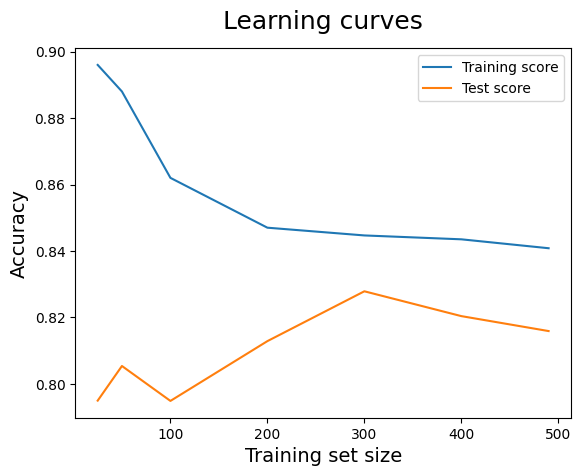

In [ ]:
train_sizes = [25,50,100,200,300,400, 490]

# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_model, 
    X=X_train, 
    y=y_train, 
    train_sizes=train_sizes, 
    cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plotting the results
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend();

# Saving the model

In [ ]:
import pickle

filename = 'model.pkl'

with open(filename, 'wb') as file:
    pickle.dump(best_model, file)